In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [2]:
products = pd.read_csv('./data/products.csv')
products.head(2)

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,moisturizing-cream-oils-mists,68.0,"Dicaprylyl Carbonate, Glycerin, Cetearyl Alcoh...",3000,216935,1.69,0.0,https://www.sephora.com/product/protini-tm-pol...,1.69,40.236686
1,The Water Cream,Tatcha,moisturizing-cream-oils-mists,68.0,"Dicaprylyl Carbonate, Glycerin, Cetearyl Alcoh...",2000,197492,0.00,1.7,https://www.sephora.com/product/the-water-crea...,1.70,40.000000


In [3]:
X = products['ingredients'] #setting our X variable

y = np.log(products['price_per_ounce']) #our y variable is price_per_ounce

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,  test_size=.33)

In [4]:
baseline_preds = [y.mean()]*2457

In [5]:
r2_score(y, baseline_preds)

0.0

In [6]:
np.sqrt(mean_squared_error(y, baseline_preds))

1.244453174700428

In [7]:
#CountVactorizer splits the ingredients by comma and not in to individual words
cvec = CountVectorizer(tokenizer=lambda x: x.split(', '))
#training CountVectorizer and transforming
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

,Train,Test,Train R^2,Test R^2
Linear Regression,0.422411,1.308403,0.886691,-0.146155
KNN,0.96821,1.153065,0.404706,0.10984
Decision Tree,0.422219,1.214509,0.886795,0.012444
Bagging,0.548393,1.031319,0.809025,0.287892
Random Forest,0.550804,0.995229,0.807342,0.336859
AdaBoost,1.18259,1.159149,0.111901,0.100422
SVR,0.685412,0.962627,0.70167,0.379594


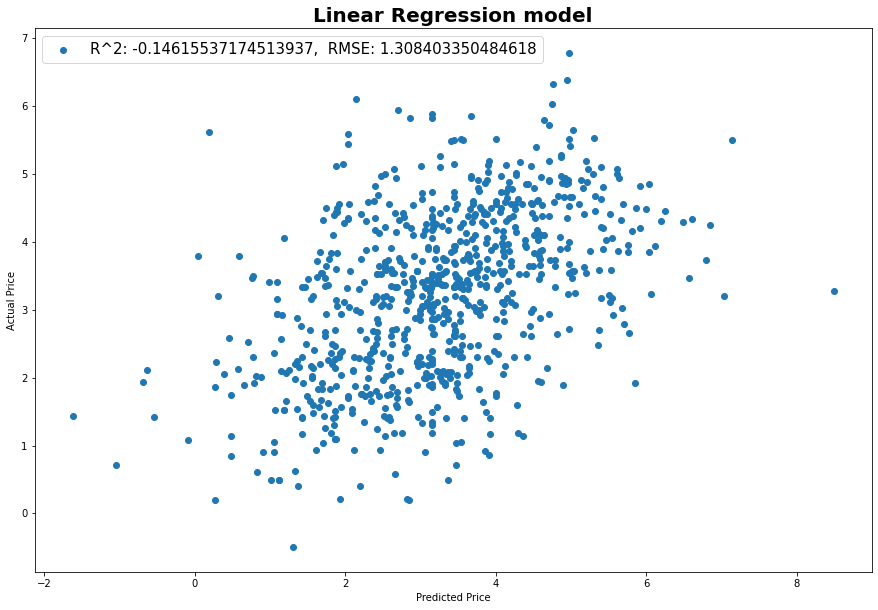

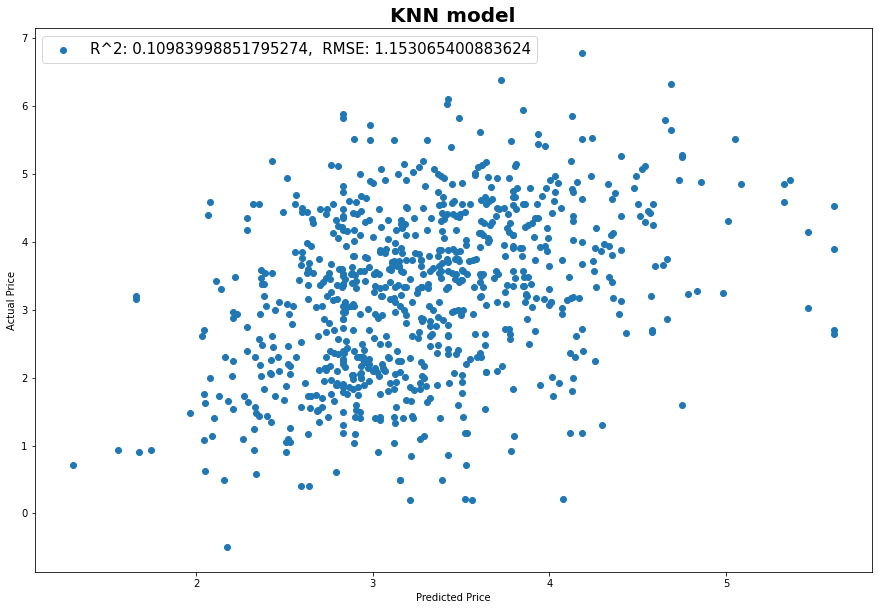

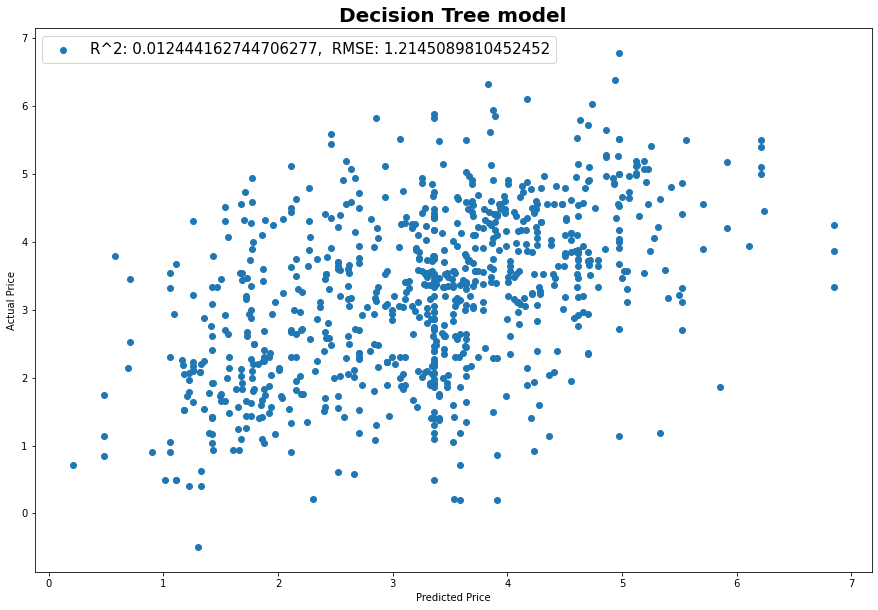

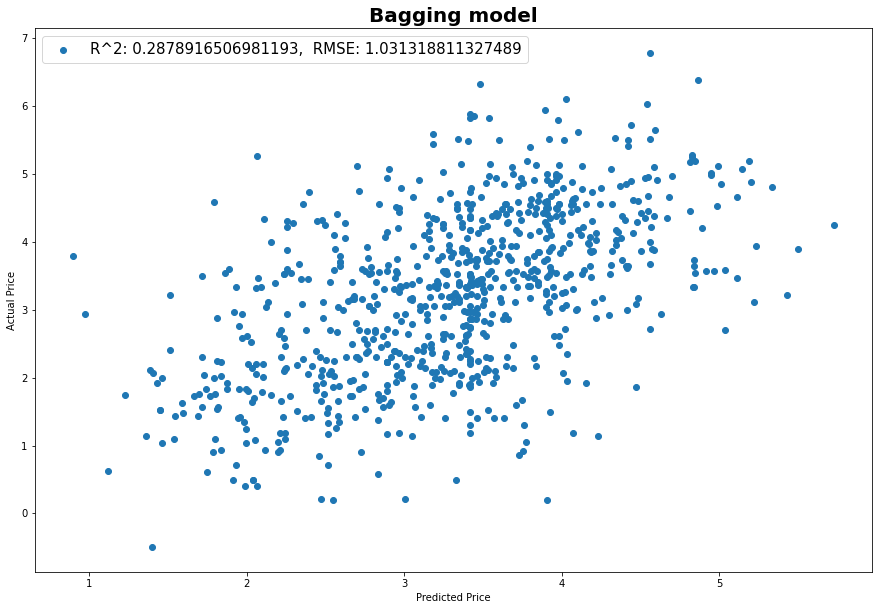

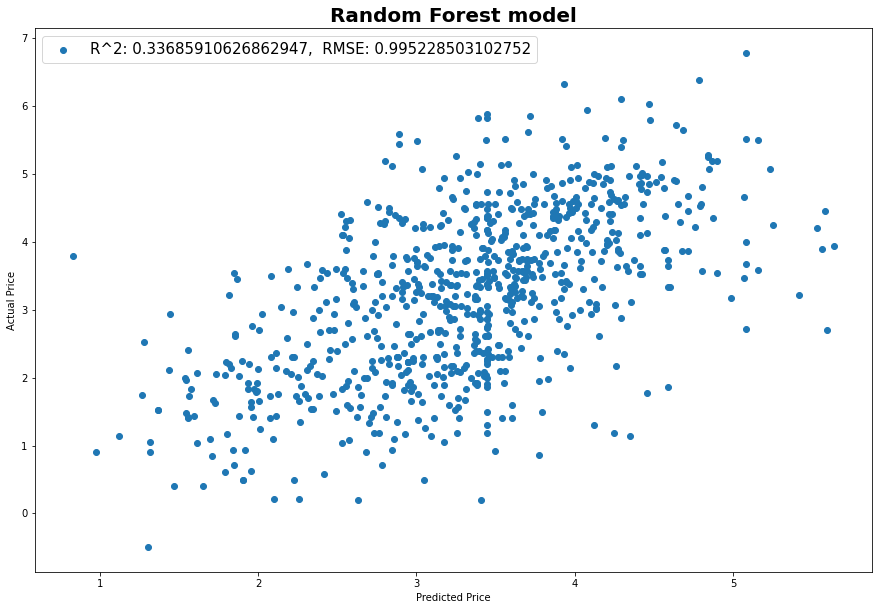

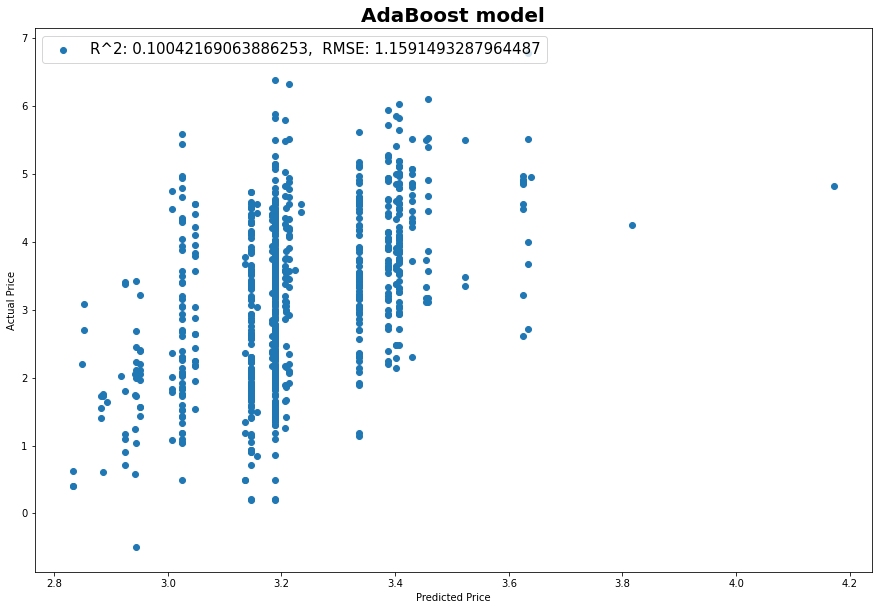

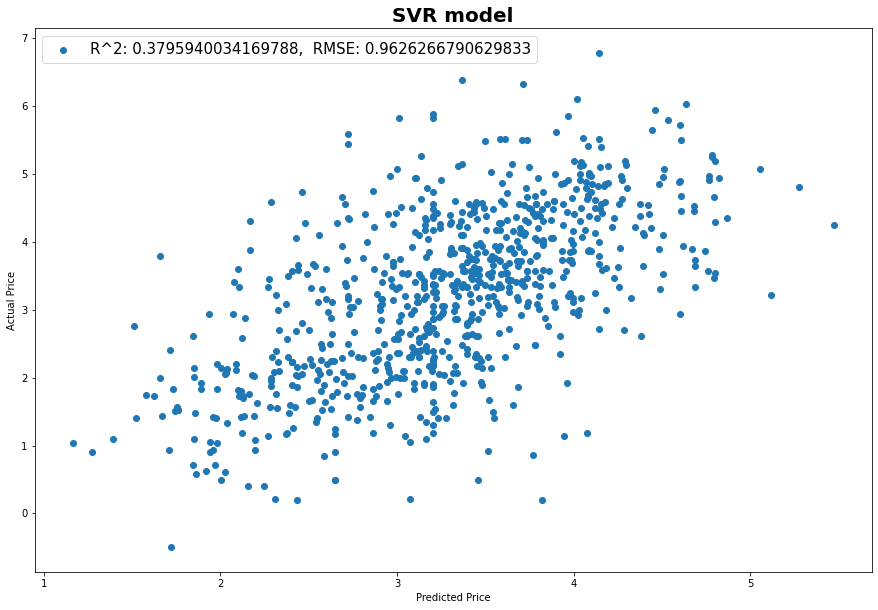

In [8]:
#instantiating models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
bdt = BaggingRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators = 10)
abr = AdaBoostRegressor(random_state = 42)
svr = SVR(gamma = 'scale')

models = {
    'Linear Regression': lr,
    'KNN': knn, 
    'Decision Tree': dt, 
    'Bagging': bdt, 
    'Random Forest': rf, 
    'AdaBoost': abr,
    'SVR': svr
}
#list of model names
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'SVR']
#creating a data frame that rmse scores will go in to
rmse_all_cvec = pd.DataFrame(index = model_names, columns = ['Train', 'Test', 'Train R^2', 'Test R^2'])
#fitting the models and calculating their rmse
for x in models:
    models[x].fit(X_train_cvec, y_train) #fitting the model
    y_train_preds = models[x].predict(X_train_cvec) #prediction for train
    y_test_preds = models[x].predict(X_test_cvec) #prediction for test
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_preds)) #rmse for train
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_preds)) #rmse for test
    rmse_all_cvec.loc[x, 'Train'] = rmse_train #updating the dataframe
    rmse_all_cvec.loc[x, 'Test'] = rmse_test
    rmse_all_cvec.loc[x, 'Train R^2'] = models[x].score(X_train_cvec, y_train)
    rmse_all_cvec.loc[x, 'Test R^2'] = models[x].score(X_test_cvec, y_test)
    
    plt.figure(figsize = (15,10))
    plt.scatter(y_test_preds, y_test)

    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('{} model'.format(x), weight='bold', fontsize=20);
    plt.legend(['R^2: {},  RMSE: {}'.format(models[x].score(X_test_cvec, y_test), rmse_test)], loc = 'upper left', fontsize = 15);
    
    
    
rmse_all_cvec

## Brand and Category

In [9]:
X = products[['brand', 'category']]
y = np.log(products['price_per_ounce'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,  test_size=.33)

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X)
X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

In [11]:
#instantiating models
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7770518875853512

In [12]:
lr.score(X_test, y_test)

0.7271361261414274

In [13]:
y_test_preds = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_preds))

0.6384000623392684

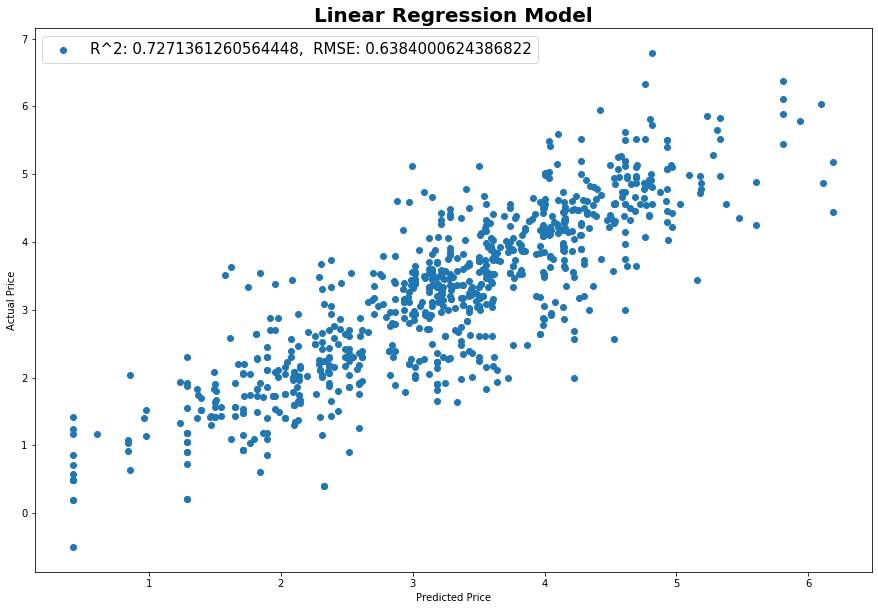

In [14]:
r_squared = lr.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))

plt.figure(figsize = (15,10))
plt.scatter(y_test_preds, y_test)

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model', weight='bold', fontsize=20);
plt.legend(['R^2: {},  RMSE: {}'.format(r_squared, rmse)], loc = 'upper left', fontsize = 15);


## Brand, Category and Ingredients

In [14]:
#making sure we run the same train test split for comparison
X = products[['brand', 'category','ingredients']]

y = np.log(products['price_per_ounce'])

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,  test_size=.33)

In [15]:
#transform the ingredients columns
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
X_train_tfidf = tfidf.fit_transform(X_train['ingredients'])
X_test_tfidf = tfidf.transform(X_test['ingredients'])

#transform the brand and category column
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train[['brand', 'category']])
X_test_ohe = ohe.transform(X_test[['brand', 'category']])

In [16]:
#make predictions for the ingredients
svr = SVR(gamma = 'scale', C = 0.722, kernel = 'linear')
svr.fit(X_train_tfidf, y_train)
y_preds_ing = svr.predict(X_test_tfidf)

#make predictions for the brand and category
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)
y_pred_brand = lr.predict(X_test_ohe)

In [17]:
#i have the weights set up cuz i played around with multiple. but the model withough weights did the best
weight_ing = 1
weight_brand = 1
y_preds_ing_w = y_preds_ing * weight_ing
y_pred_brand_w = y_pred_brand * weight_brand
final_predictions = []
for i in range(len(y_preds_ing_w)):
    final_predictions.append(np.average([y_preds_ing_w[i], y_pred_brand_w[i]]))

In [18]:
r_squared = r2_score(y_test, final_predictions)

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

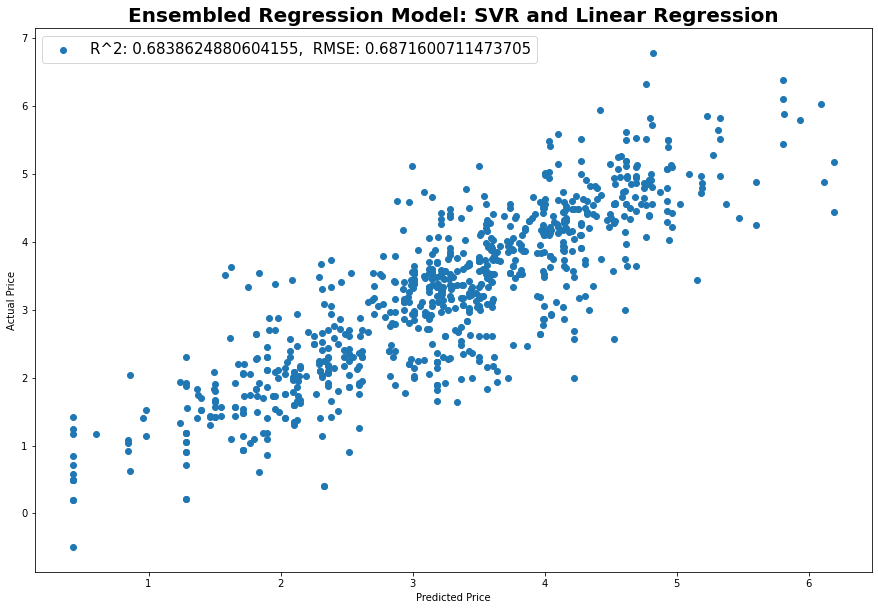

In [20]:
plt.figure(figsize = (15,10))
plt.scatter(y_test_preds, y_test)

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ensembled Regression Model: SVR and Linear Regression', weight='bold', fontsize=20);
plt.legend(['R^2: {},  RMSE: {}'.format(r_squared, rmse)], loc = 'upper left', fontsize = 15);